<a href="https://colab.research.google.com/github/RodrigueNdab/RodrigueNdab.github.io/blob/main/REstimationWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimation of the reproduction number


## install and load packages

In [ ]:
#CRAN packages - installing can take some time
install.packages("devtools") # package required to install packages from Github
install.packages("tidyverse") #package required for simpler code
#load packages
library(devtools)
library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’




In [ ]:
#Final Size estimator package
devtools::install_github("https://github.com/EgilFischer/FinalSizeEstimator.git", force = TRUE) #install custom made code for final size calculation
library(FinalSizeEstimator)


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpz6nWKx/remotes443ab067e5/EgilFischer-FinalSizeEstimator-0ebd756/DESCRIPTION’ ... OK
* preparing ‘FinalSizeEstimator’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘FinalSizeEstimator_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# The final size distribution

In this first exercise we will have a look at the use of the final size distribution to estimate the reproduction number. The final size distribution is determined by the initial values and the reproduction number. We use the package FinalSizeEstimator from https://github.com/EgilFischer/FinalSizeEstimator.git which was installed above.

First let's get an idea of the effect of R and the inital values on the final size distribution.
1. Try a few different values of R. What do you see?
2. Try some different values of i0. What do you see?

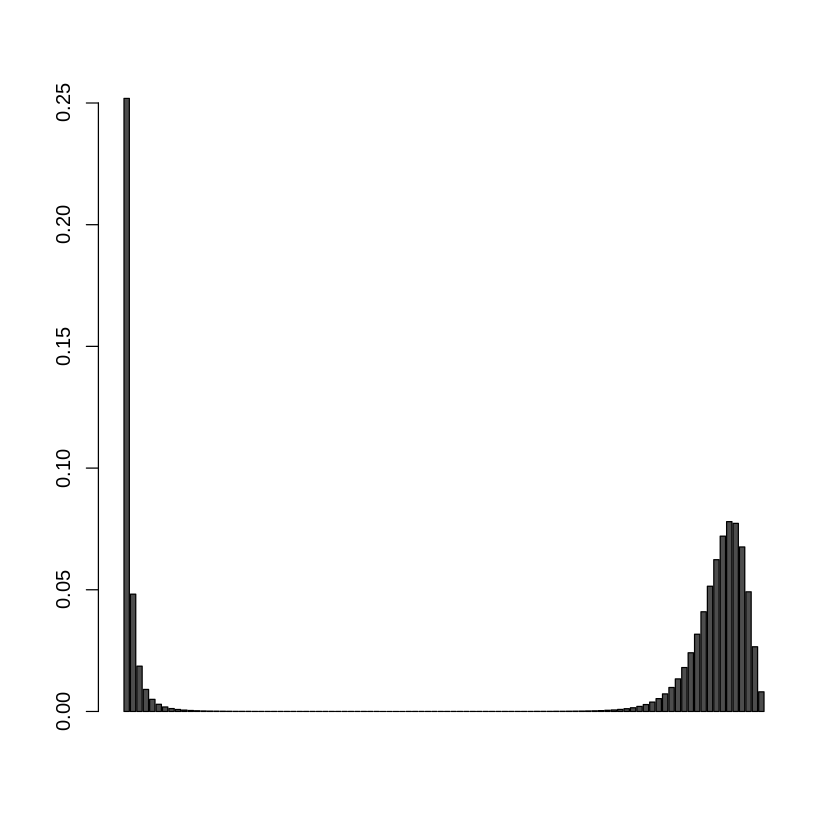

In [ ]:
R0 = 3; #Basic reproduction number
i0 = 1; #number of initial infectious animals
n  =100
final.size.distribution <- distFS(R = R0, s0in = n-i0, i0in =i0)
barplot(final.size.distribution)


## Probability of a major outbreak

The final size distribution shows major and minor outbreaks. If you have tried some different values, you might have noticed that the fraction of major outbreaks depend on the value of R0 and the number of initially infected animals. Indeed, the probability of a major outbreak depends on the basic reproduction number and the number of initial infected individuals. For the standard SIR model the probability of a major outbreaks is given by:
$$p_{major} = 1 - \dfrac{1}{{R_0}^{i_0}} \text{ for } R_0 \geq 1$$

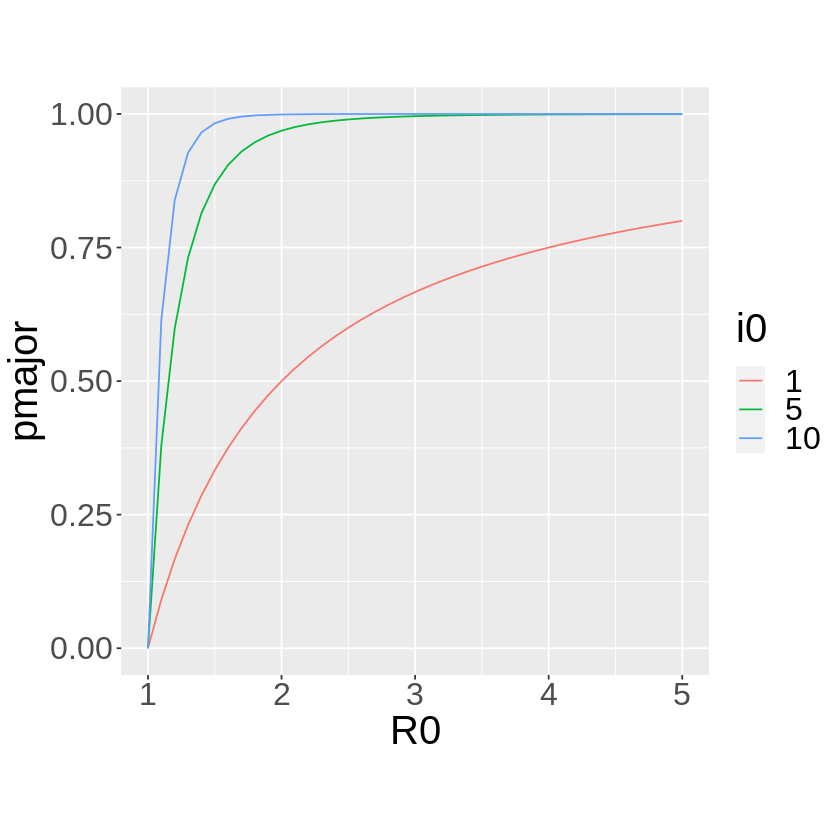

In [ ]:
major.outbreak <- data.frame(R0 = rep(seq(1,5,0.1),3), i0 = rep(c(1,5,10), each = 41))
major.outbreak$pmajor <- 1-1/(major.outbreak$R0^major.outbreak$i0)

ggplot(major.outbreak)+geom_path(aes(x = R0, y = pmajor, colour = as.factor(i0)))+labs(colour = "i0")+theme(text = element_text(size = 24), aspect.ratio = 1)



# Estimation of transmission parameters

## Estimation of R using the final size distribution

The final size distribution can be used to estimate the reproduction number. The distribution is completely determined, so that we can exactly calculate the confidence interval and do hypothesis testing by determining the probability to find more extreme values.
In the FinalSizeEstimator package this is implemented in the FinalSize function:

point.est	 = point estimate of R \
ci.ll	= confidence interval lower limit\
ci.ul	= confidence interval lower upper\
pval.above1	= p-value R > 1 \
pval.below1 = p-value R < 1	\
pval.equal1 = p-value R = 1

In [ ]:
#Example of an experiment with 2 replicates
FinalSize(x = c(0,1), #vector of the number of susceptible animals that are infected during the experiment
          s0 = c(11,14), #vector of number of susceptible animals at the start of the experiment
          i0 = c(9,6), #vector of number of infectious animals at the start of the experiment
          alpha = 0.05) #confidence level

point.est,ci.ll,ci.ul,pval.above1,pval.below1,pval.equal1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,0,0.68,0,1,0


What happens if

1.   you change the number of initial **susceptible** animals?
2.   you change the number of initial **infectious** animals?
3.   none of the susceptible animals are infected?
4.   all susceptible animals are infected?



What happens if you have the same number of animals but now in ten pair-experiments?

In [ ]:
FinalSize(x = c(1,1,0,0,0,0,0,0,0,0),s0 = rep(1,10),i0 = rep(1,10), alpha = 0.05)

point.est,ci.ll,ci.ul,pval.above1,pval.below1,pval.equal1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5,0.05,2.51,0.3,0.9,0.27


### Application to real data

In the package data sets derived from a transmission experiment by [Van der Goot et al. 2005](https://www.pnas.org/doi/full/10.1073/pnas.0505098102). The practical is restricted to the experiments in which transmission occured. Therefore we selected only replicates < 7.

1. Display the data set \
FS = final size (number of susceptibles that were infected)\
S0 = initial number of susceptibles\
I0 = initial number of infectious

In [ ]:
#in the package 5 different treatments in duplo exist
# do not use replicates 7 - 10 because in these cases no infections were found
HPAIfs <- HPAIfs%>%filter(replicate <7) #
HPAIfs

replicate,experiment,FS,S0,I0
<int>,<chr>,<int>,<int>,<int>
1,control,5,5,5
2,control,5,5,5
3,H7N1w1,1,5,5
4,H7N1w1,0,5,5
5,H7N3w1,5,5,5
6,H7N3w1,4,5,5


2. Do the calculation for each data set

In [ ]:
#Estimation for all experiments together
FinalSize(HPAIfs$FS,HPAIfs$S0,HPAIfs$I0)
#Estimation for group by experiment
FinalSize(HPAIfs$FS,HPAIfs$S0,HPAIfs$I0, group = HPAIfs$experiment)

point.est,ci.ll,ci.ul,pval.above1,pval.below1,pval.equal1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.01,0.87,3.05,0.96,0.07,0.06


Group,point.est,ci.ll,ci.ul,pval.above1,pval.below1,pval.equal1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
control,Inf,1.30,Inf,1.00,0.01,0.01
H7N1w1,0.20,0.01,1.35,0.07,0.98,0.07
H7N3w1,2.92,0.94,9.49,0.99,0.03,0.03


3. What do you conclude about the R-values for the different experiments?

## Estimation from longitudinal data

Often we have more information on the transmission process. In the case of the data by Van der Goot et al. 2005.
There are three separate data sets depending on definition of an infected and infectious individual.
In this study animals were sampled from the cloaca and the trachea. Data set "HPAItrachea" is the data for the tracheal swaps and "HPAIcloaca" for hte cloacal swaps.Data set "HPAIboth" is a data set in which a bird is infected if it is positive in either one of the samples (cloaca and / or trachea). \
In this study two vaccines (derived from strains H7N1 and H7N3) were tested against a control group.
Variables:\
* Vac = vaccination: con = control, H7N1 = vaccination strain H7N1 and H7N3 = vaccination strain H7N3
*   Experiment = number of the experiment (1 - 6) (this was replicate in the previous data set)
*   DPI = days post inoculation
*  s = number of susceptible birds at start of interval
*  i = number of infectious birds at start of interval
*  c = number of new infected birds during interval
*  n = total number of birds
*  dt = length of interval




In [ ]:
head(HPAIboth)#show first 6 entries
tail(HPAIboth)#show last 6 entries

,Vac,Experiment,DPI,s,i,c,n,dt
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,con,1,1,5,5,3,10,1
2,con,1,2,2,8,2,10,1
3,con,1,3,0,9,0,9,1
4,con,1,4,0,6,0,6,1
5,con,1,5,0,5,0,5,1
6,con,1,6,0,4,0,4,1


,Vac,Experiment,DPI,s,i,c,n,dt
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
63,H7N3,6,6,4,5,0,10,1
64,H7N3,6,7,4,3,0,10,1
65,H7N3,6,8,4,2,0,10,1
66,H7N3,6,9,4,1,0,10,1
67,H7N3,6,10,4,1,0,10,1
68,H7N3,6,14,4,1,0,10,4


Let's first visualize the data.

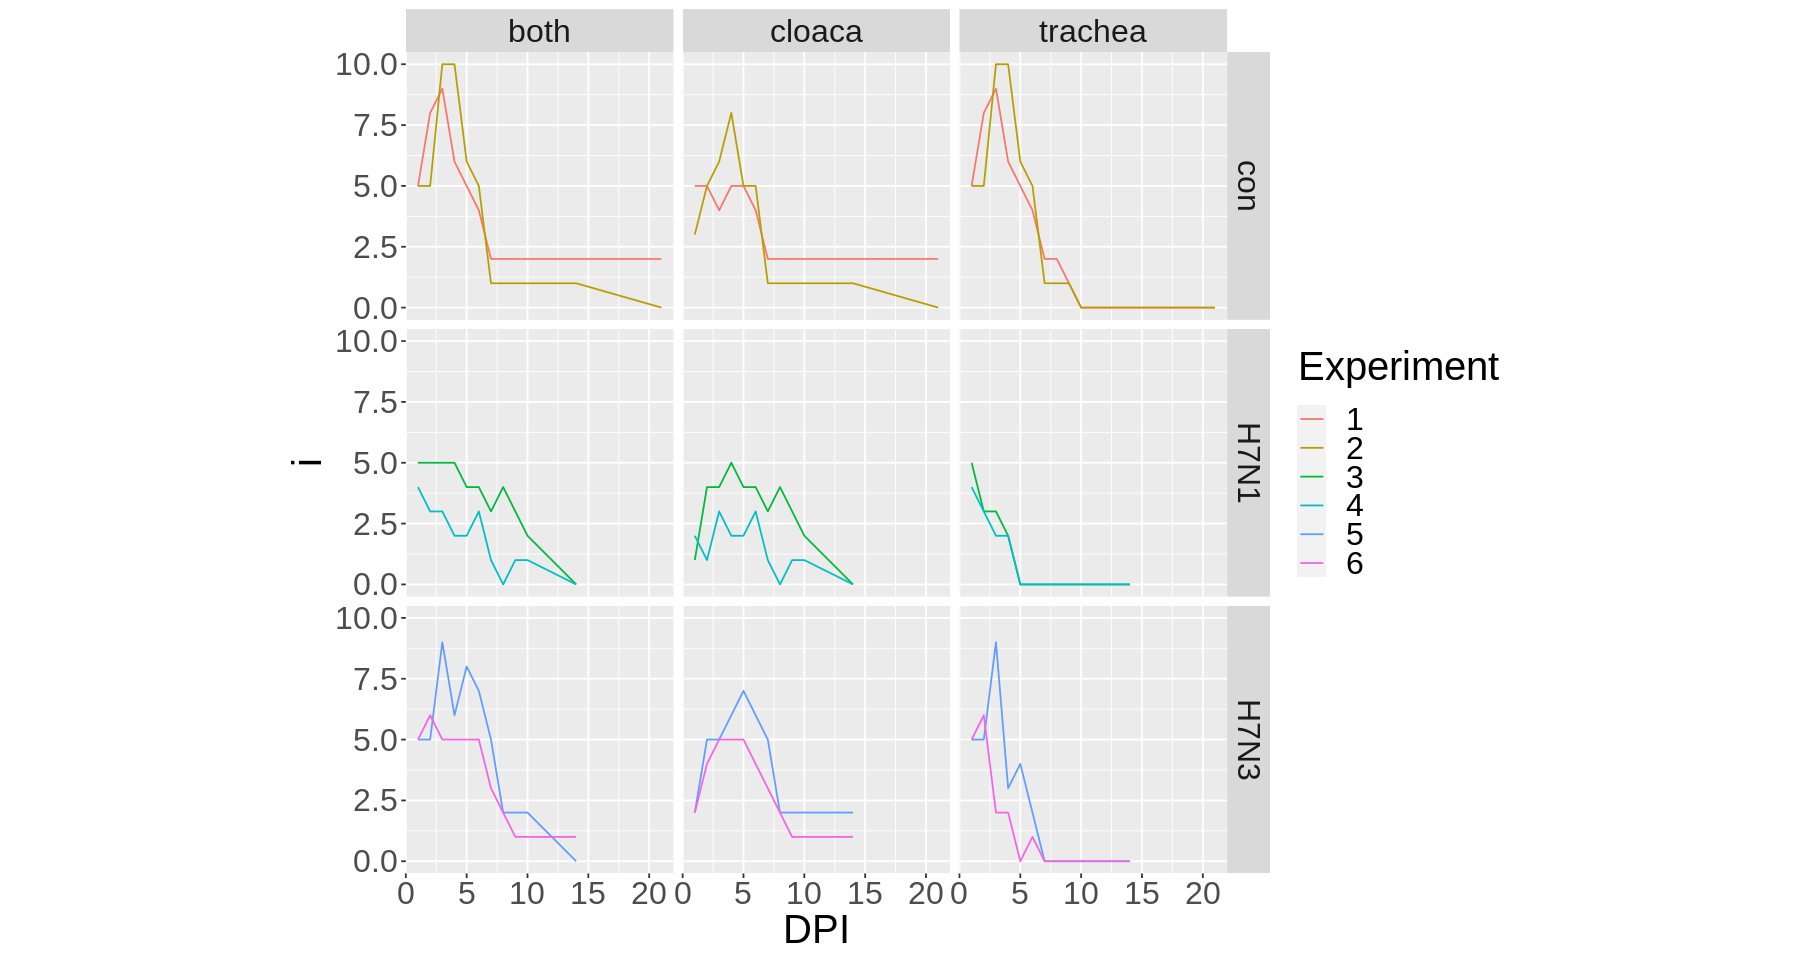

In [ ]:
options(repr.plot.width=15, repr.plot.height=8) # set size of the figure

ggplot(rbind(cbind(HPAIboth, outcome = "both"),
            cbind(HPAIcloaca, outcome = "cloaca"),
            cbind(HPAItrachea, outcome = "trachea")))+ #put the data sets together with a label
  geom_path(aes(DPI, i, colour = as.factor(Experiment)))+ #plot a line graph
  labs(colour = "Experiment")+ #set the label for the legend
  facet_grid(Vac~outcome)+ #make different panels for treatment and outcome
  theme(text = element_text(size = 24), aspect.ratio = 1) # some aesthetics.



Observe and discuss the differences between the data sets. Remember that these are the same animals!

### Direct transmission

Estimation of the transmission coefficient $\beta$ can be done using a generalized linear model. \\
The probability if a susceptible animal being infected during a time interval is: \\
$p_{inf} = 1- e^{-\beta \dfrac{I}{N} \Delta t}  $ \\

The expected number of cases $C$ during an interval follows from a binomal distribution with expected value: \\
$E(C) = p_{inf} S = \left(1- e^{-\beta \dfrac{I}{N} \Delta t} \right) S $

After some algebra we arrive at
$\ln\left(-\ln(1-\dfrac{E(C)}{S}\right)  = \ln(\beta) +\ln\left(\dfrac{I}{N}\Delta t\right)$

This can be used in standard generalized model with a complementary log-log link function (cloglog in R)



In [ ]:
#Use generalized linear models
print("-----------------Both samples positive----------------------")
fit.both <- glm(data = HPAIboth[HPAIboth$s >0 & HPAIboth$i >0,   ],cbind(c,s - c) ~ factor(Vac), family=binomial(link="cloglog"),offset=log((i/n) * dt))
summary(fit.both)
print("-----------------Cloacal sample positive----------------------")
fit.cloaca <- glm(data = HPAIcloaca[HPAIcloaca$s >0 & HPAIcloaca$i >0,   ],cbind(c,s - c) ~ factor(Vac), family=binomial(link="cloglog"),offset=log((i/n) * dt))
summary(fit.cloaca)
print("-----------------Tracheal sample positive----------------------")
fit.trachea <- glm(data = HPAItrachea[HPAItrachea$s >0 & HPAItrachea$i >0,   ],cbind(c,s - c) ~ factor(Vac), family=binomial(link="cloglog"),offset=log((i/n) * dt))
summary(fit.trachea)


[1] "-----------------Both samples positive----------------------"



Call:
glm(formula = cbind(c, s - c) ~ factor(Vac), family = binomial(link = "cloglog"), 
    data = HPAIboth[HPAIboth$s > 0 & HPAIboth$i > 0, ], offset = log((i/n) * 
        dt))

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.5377     0.3262   1.648 0.099277 .  
factor(Vac)H7N1  -3.8053     1.0506  -3.622 0.000292 ***
factor(Vac)H7N3  -1.8466     0.5222  -3.537 0.000405 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 73.335  on 37  degrees of freedom
Residual deviance: 45.857  on 35  degrees of freedom
AIC: 59.338

Number of Fisher Scoring iterations: 6


[1] "-----------------Cloacal sample positive----------------------"



Call:
glm(formula = cbind(c, s - c) ~ factor(Vac), family = binomial(link = "cloglog"), 
    data = HPAIcloaca[HPAIcloaca$s > 0 & HPAIcloaca$i > 0, ], 
    offset = log((i/n) * dt))

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)      -0.3139     0.3157  -0.994  0.32008   
factor(Vac)H7N1  -2.7611     1.0510  -2.627  0.00861 **
factor(Vac)H7N3  -2.0914     0.6569  -3.184  0.00145 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 55.046  on 49  degrees of freedom
Residual deviance: 37.502  on 47  degrees of freedom
AIC: 57.339

Number of Fisher Scoring iterations: 6


[1] "-----------------Tracheal sample positive----------------------"



Call:
glm(formula = cbind(c, s - c) ~ factor(Vac), family = binomial(link = "cloglog"), 
    data = HPAItrachea[HPAItrachea$s > 0 & HPAItrachea$i > 0, 
        ], offset = log((i/n) * dt))

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)        0.5377     0.3262   1.648   0.0993 .
factor(Vac)H7N1  -19.7964  2662.1237  -0.007   0.9941  
factor(Vac)H7N3   -1.2553     0.5245  -2.393   0.0167 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58.092  on 22  degrees of freedom
Residual deviance: 36.057  on 20  degrees of freedom
AIC: 47.752

Number of Fisher Scoring iterations: 18


Give an interpretation of the estimates:
- What is the intercept?
- What are the factor(Vac)H7N1 and factor(Vac)H7N3?
- What is the effect of vaccination?

### From transmission coefficient to Reproduction number

The basic reproduction number is the transmission coefficient times the infectious period:
$R_0 = \beta \times T_{infectious}$



In [ ]:
#estimates of the infectious period from Van der Goot et al.2005
Tinf = data.frame(mean = c(6.3, #control
                            1,  #H7N1 vaccin
                            3.7))

#calculate R
beta.control.both <- exp(fit.both$coefficients[1]) # control for both
R.control.both <- signif(beta.control.both*Tinf$mean[1],3) #multiply by the infectious period
print(paste("R0 estimated from both samples:", R.control.both))

beta.control.cloaca <- exp(fit.cloaca$coefficients[1]) # control for cloaca samples
R.control.cloaca <- signif(beta.control.cloaca*Tinf$mean[1],3)#multiply by the infectious period
print(paste("R0 estimated from cloaca samples:", R.control.cloaca))

beta.control.trachea <- exp(fit.trachea$coefficients[1]) # control for trachea samples
R.control.trachea <- signif(beta.control.trachea*Tinf$mean[1],3)#multiply by the infectious period
print(paste("R0 estimated from trachea samples:", R.control.trachea))


[1] "R0 estimated from both samples: 10.8"
[1] "R0 estimated from cloaca samples: 4.6"
[1] "R0 estimated from trachea samples: 10.8"


Given these different estimates how would the final size distribution look like?

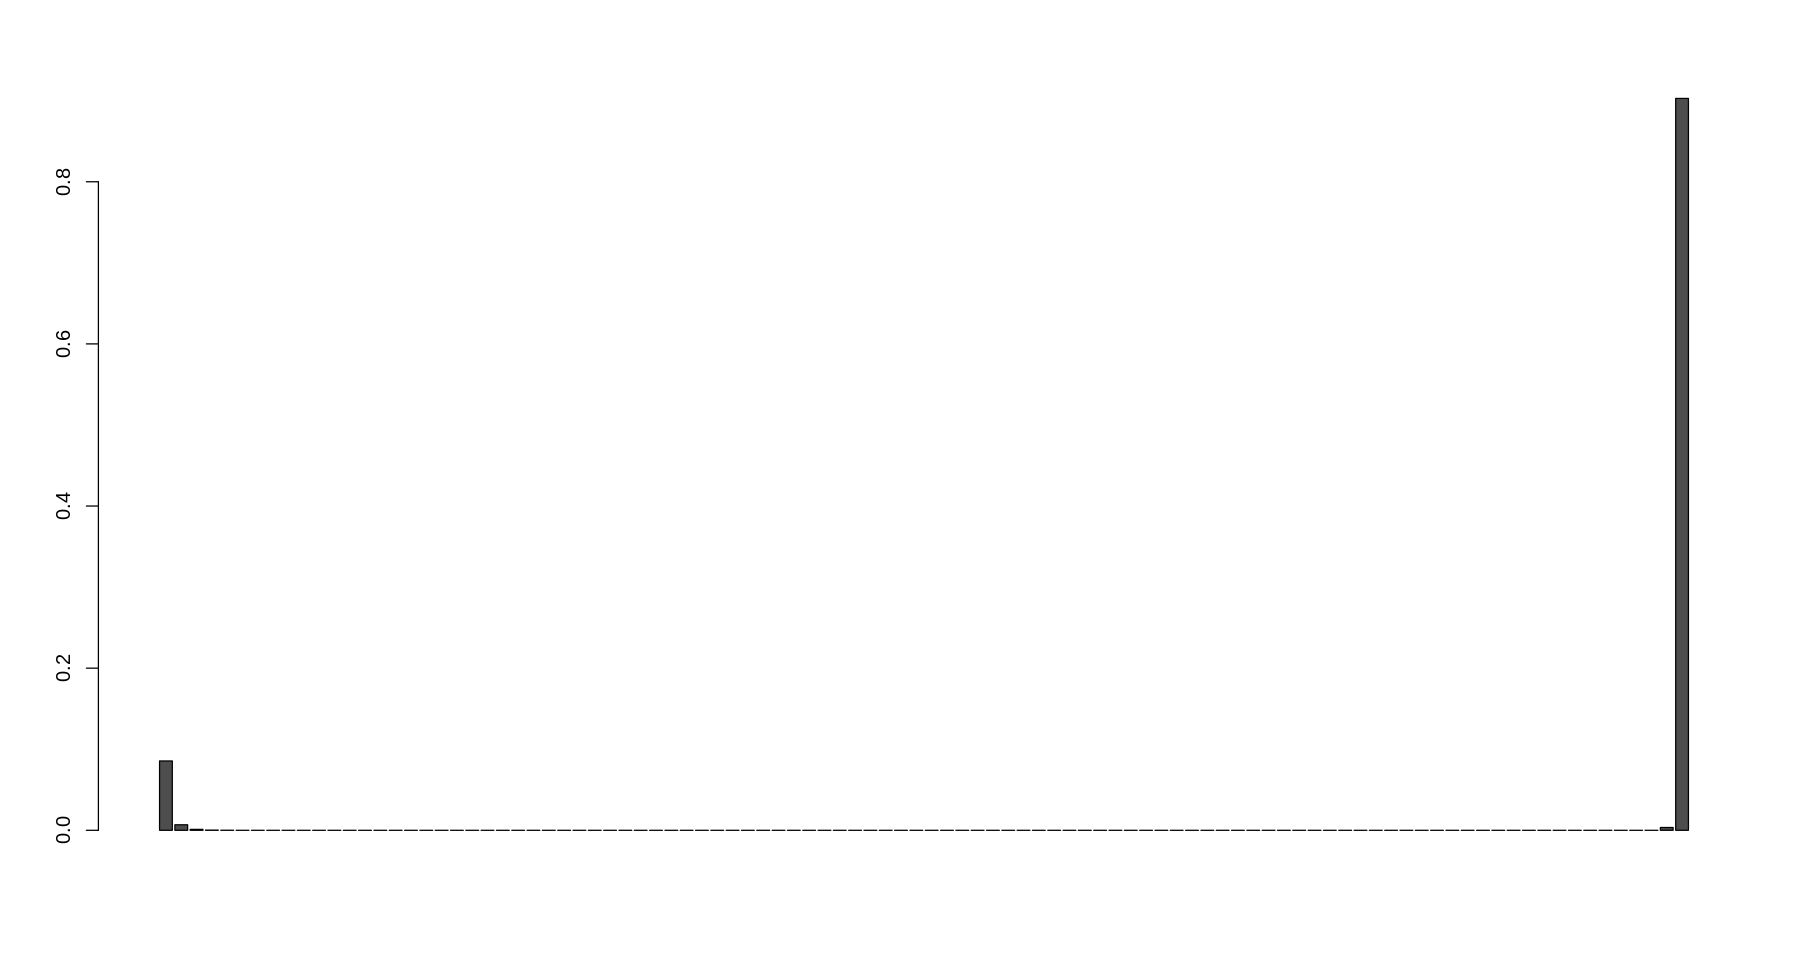

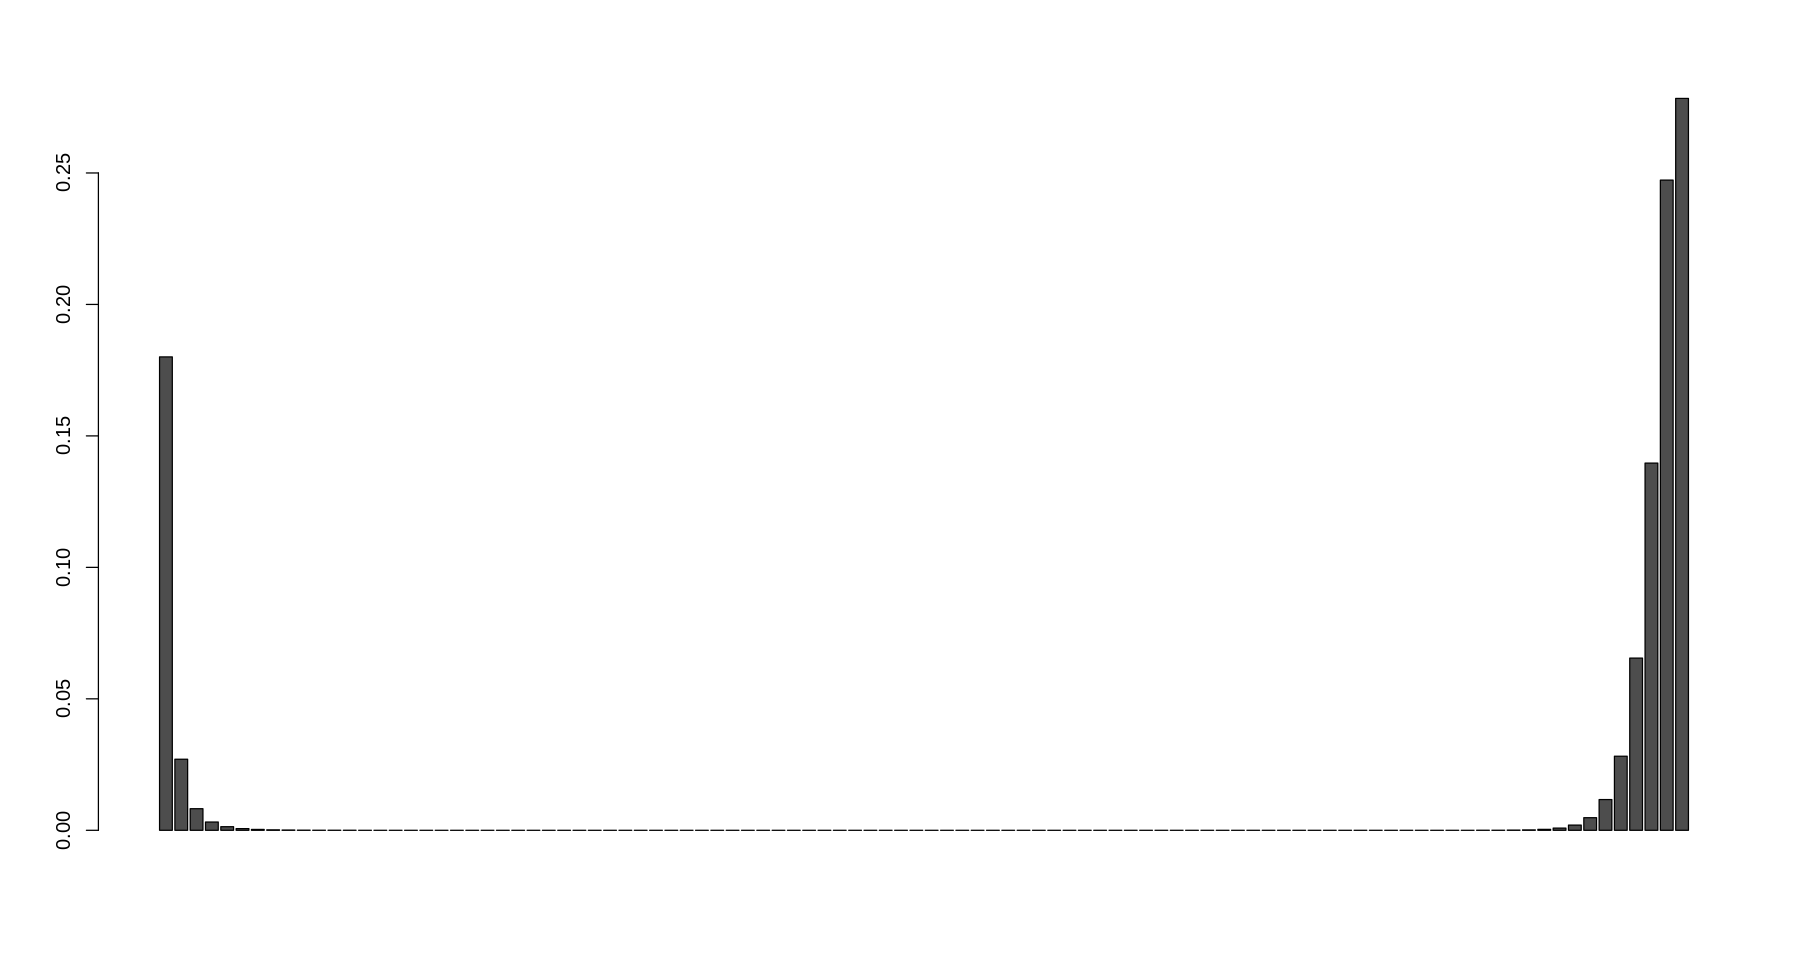

In [ ]:
i0 = 1; #number of initial infectious animals
n  =100
final.size.distribution <- distFS(R = R.control.both , s0in = n-i0, i0in =i0)
barplot(final.size.distribution)
final.size.distribution <- distFS(R = R.control.cloaca , s0in = n-i0, i0in =i0)
barplot(final.size.distribution)

Calculate for the vaccins by:

In [ ]:
#R values
beta.H7N1vac <- exp(fit.both$coefficients[1]+fit.both$coefficients[2]) # H7N1 vaccin
R.H7N1vac <- signif(beta.H7N1vac*Tinf$mean[3],3)
print(paste("R wiht H7N1 vaccination:", R.H7N1vac))
beta.H7N3vac <- exp(fit.both$coefficients[1]+fit.both$coefficients[3]) # H7N3 vaccin
R.H7N3vac <- signif(beta.H7N3vac*Tinf$mean[3],3)
print(paste("R wiht H7N3 vaccination:", R.H7N3vac))

[1] "R wiht H7N1 vaccination: 0.141"
[1] "R wiht H7N3 vaccination: 0.999"


How would the final size distribution look like for  unvaccinated and vaccinated populations?

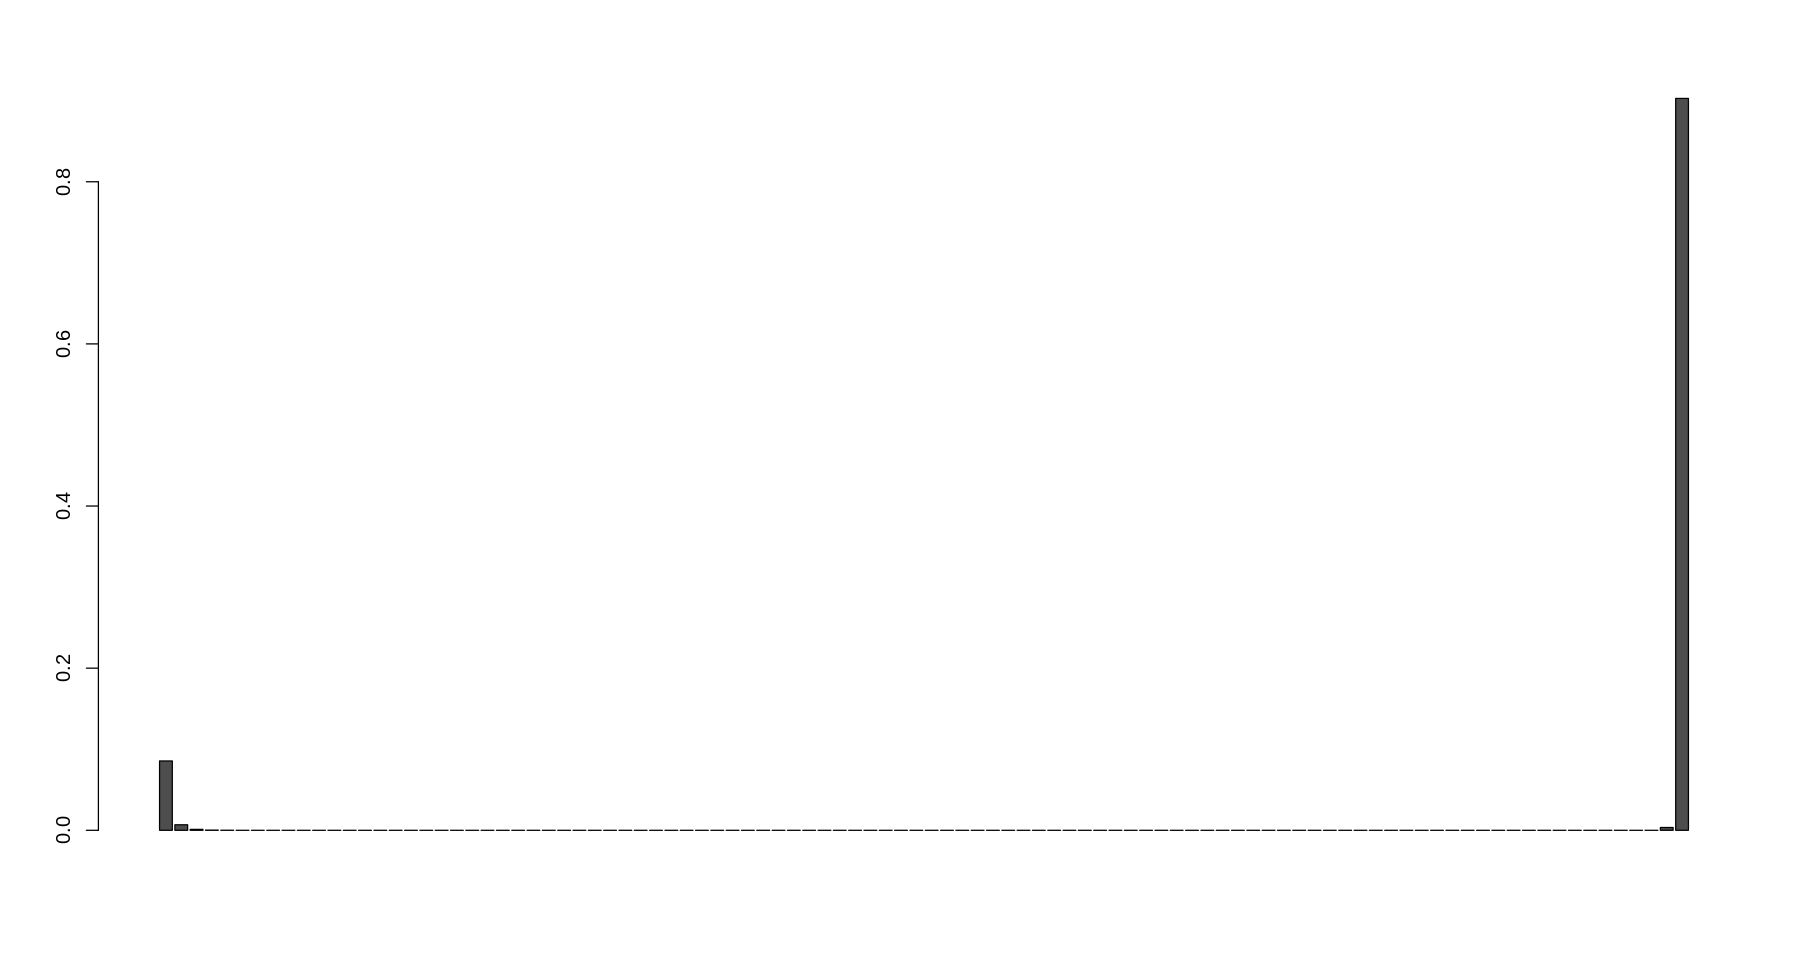

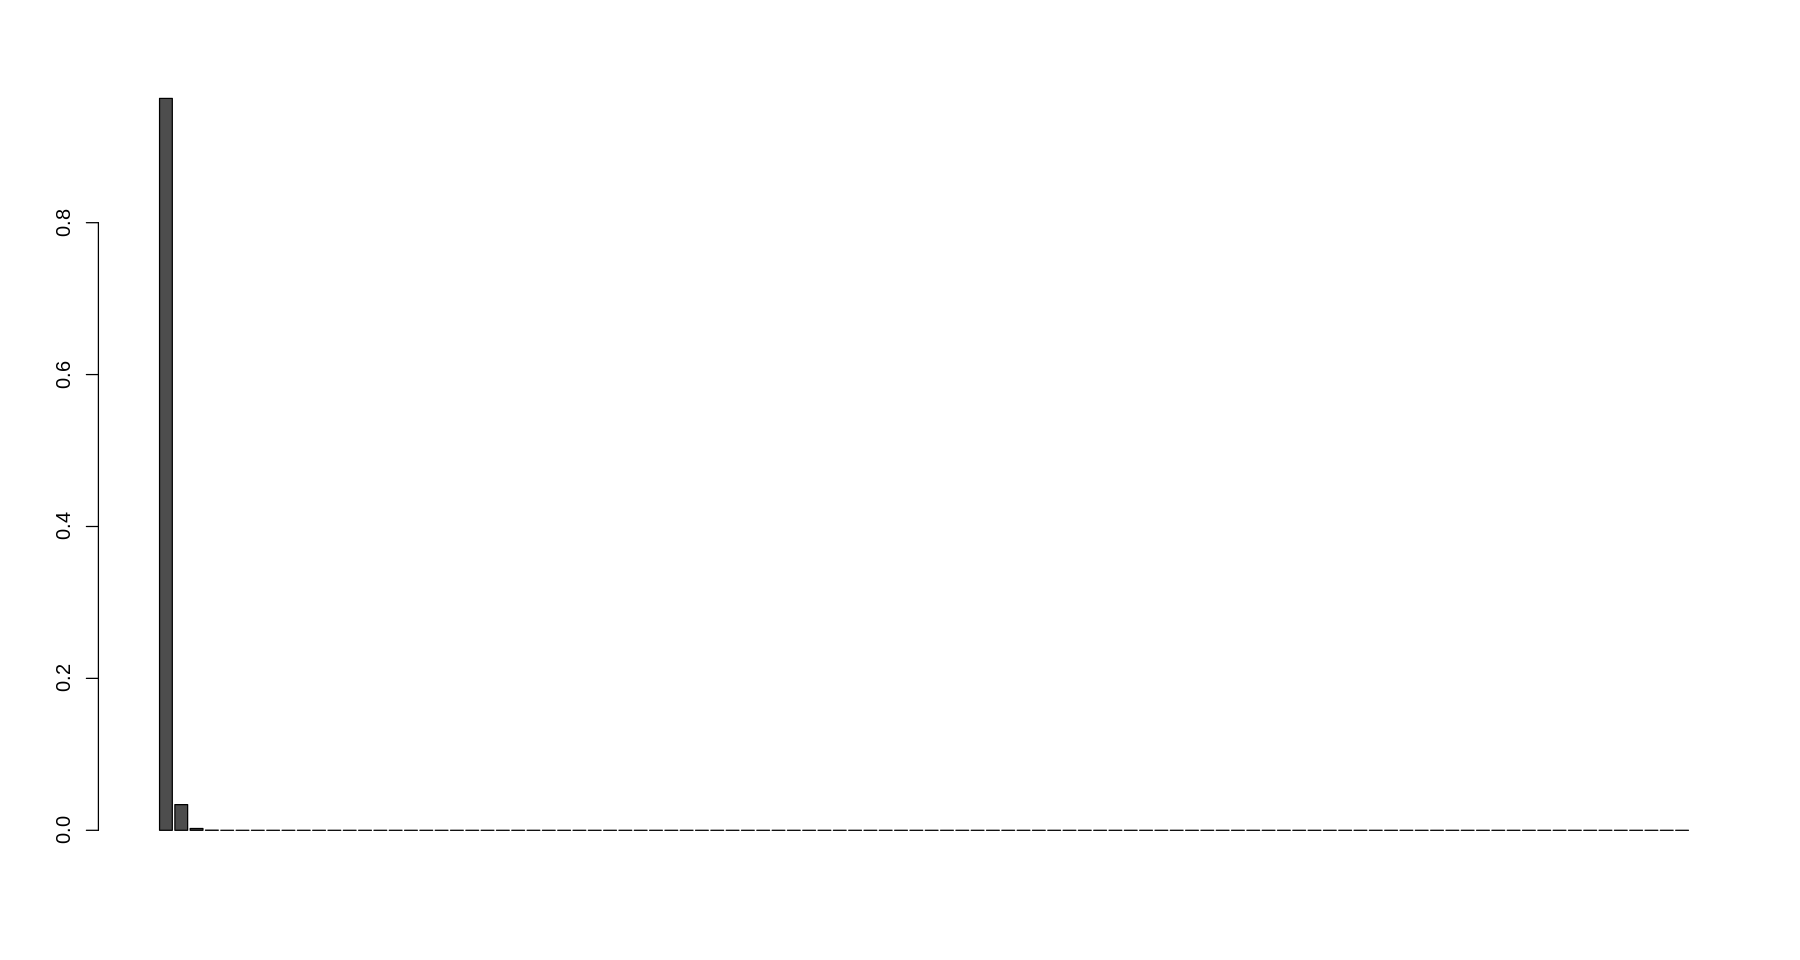

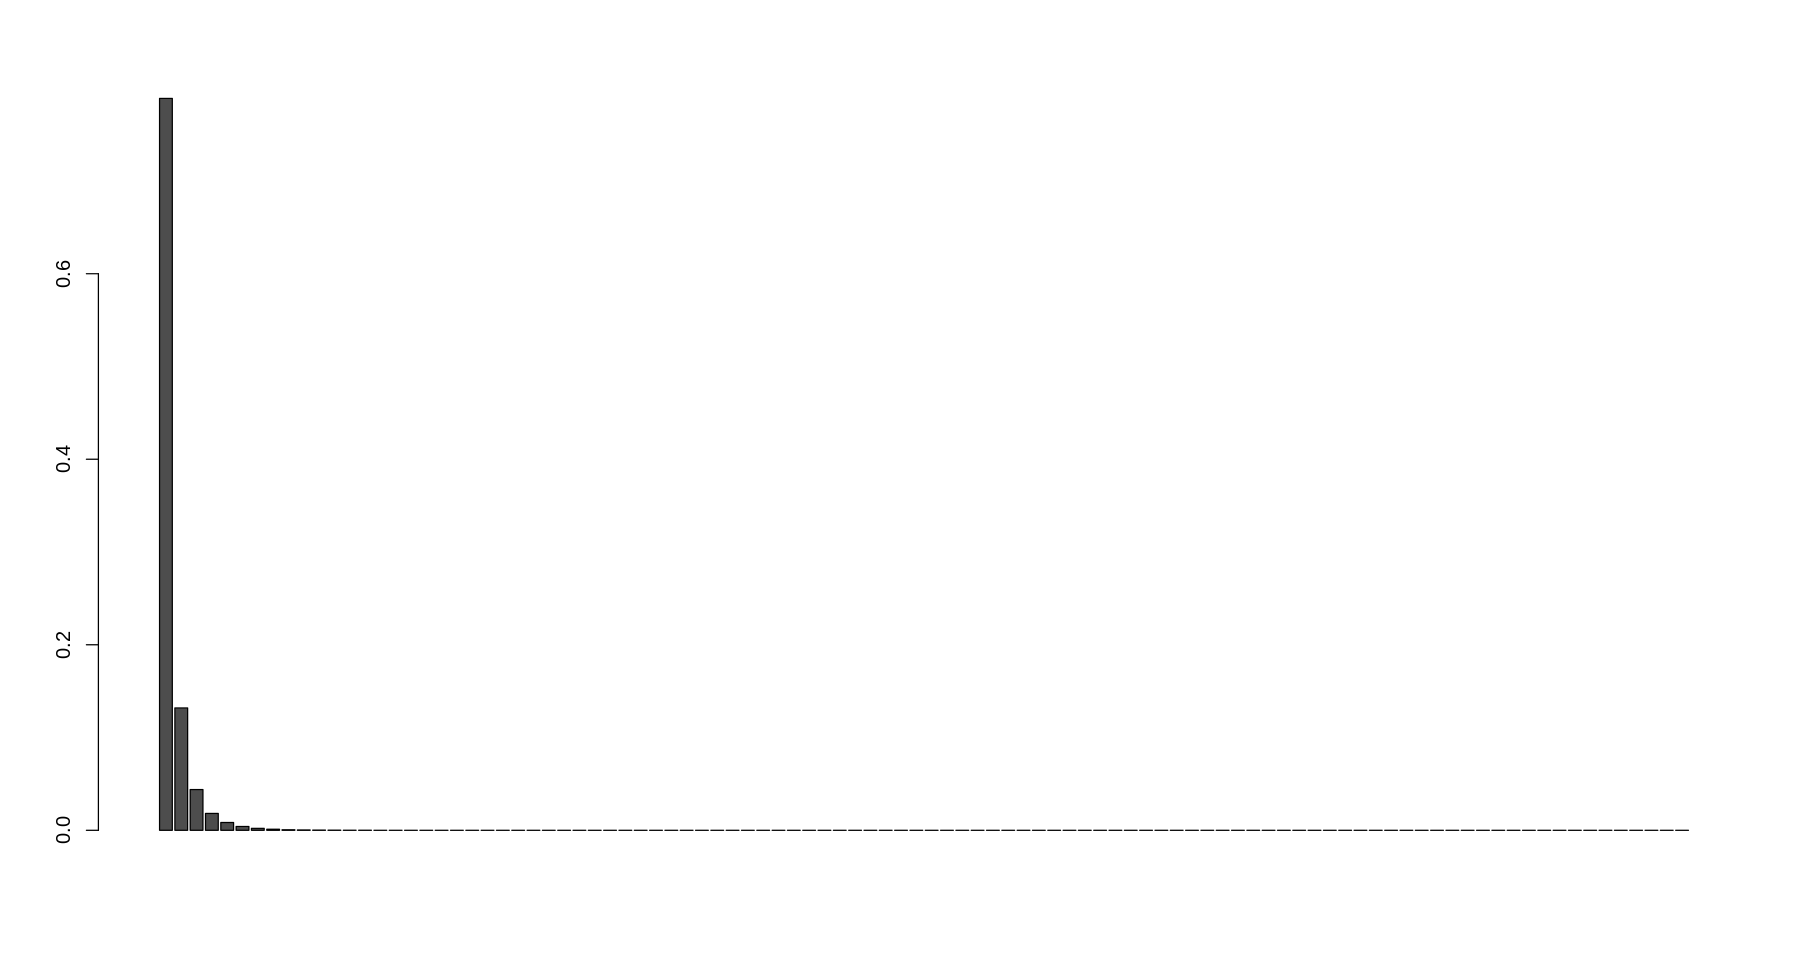

In [ ]:
i0 = 1; #number of initial infectious animals
n  =100
final.size.distribution <- distFS(R = R.control.both , s0in = n-i0, i0in =i0)
barplot(final.size.distribution)
final.size.distribution <- distFS(R = beta.H7N1vac , s0in = n-i0, i0in =i0)
barplot(final.size.distribution)
final.size.distribution <- distFS(R = beta.H7N3vac , s0in = n-i0, i0in =i0)
barplot(final.size.distribution)

# Additional material

## Indirect transmission

Estimation of the transmission coefficient $\beta$ can also be done using a generalized linear model. \\
$p_{inf} = 1- e^{-\beta \dfrac{E}{N}\Delta t}  $ \\

The environmental contamination $E$ is now calculated based on a decay rate and excretion by infectious individuals:

$E_t = (1-\mu)E_{t-1} + I_{t-1}$ \\

After some algebra we arrive at \\
$\ln\left(-\ln(1-\dfrac{E(C)}{S}\right)  = \ln(\beta) +\ln\left(\dfrac{E}{N}\Delta t\right)$

This can be used in standard generalized model with a complementary log-log link function (cloglog in R)



1. What do you expect to be the influence of this parameters on $\beta$?

2. Try creating different data sets with different values of $\mu$.

Extra question: What is the unit of $\beta$?







In [ ]:
#create a new variable for the environmental contamination
HPAIboth$e <- 0
mu <- 0.5 #decay per day
for(i in HPAIboth$Experiment)
{
    previousI <- HPAIboth$i[HPAIboth$Experiment ==i & HPAIboth$DPI ==1];
    previousE <- 0;
    for(t in 1:length(HPAIboth[HPAIboth$Experiment ==i,] $DPI)){
        HPAIboth$e[HPAIboth$Experiment ==i & HPAIboth$DPI == HPAIboth$DPI[t]] <-  ((1-mu)^HPAIboth$dt[HPAIboth$Experiment ==i & HPAIboth$DPI == HPAIboth$DPI[t]] ) * previousE + previousI*HPAIboth$dt[HPAIboth$Experiment ==i & HPAIboth$DPI == HPAIboth$DPI[t]]
        previousI <- HPAIboth$i[HPAIboth$Experiment ==i & HPAIboth$DPI == HPAIboth$DPI[t]];
        previousE <- HPAIboth$e[HPAIboth$Experiment ==i & HPAIboth$DPI == HPAIboth$DPI[t]];

    }
}


#head(HPAIboth)
#tail(HPAIboth)


,Vac,Experiment,DPI,s,i,c,n,dt,e
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,con,1,1,5,5,3,10,1,5.00000
2,con,1,2,2,8,2,10,1,7.50000
3,con,1,3,0,9,0,9,1,11.75000
4,con,1,4,0,6,0,6,1,14.87500
5,con,1,5,0,5,0,5,1,13.43750
6,con,1,6,0,4,0,4,1,11.71875


,Vac,Experiment,DPI,s,i,c,n,dt,e
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
63,H7N3,6,6,4,5,0,10,1,9.968750
64,H7N3,6,7,4,3,0,10,1,9.984375
65,H7N3,6,8,4,2,0,10,1,7.992188
66,H7N3,6,9,4,1,0,10,1,5.996094
67,H7N3,6,10,4,1,0,10,1,3.998047
68,H7N3,6,14,4,1,0,10,4,4.249878


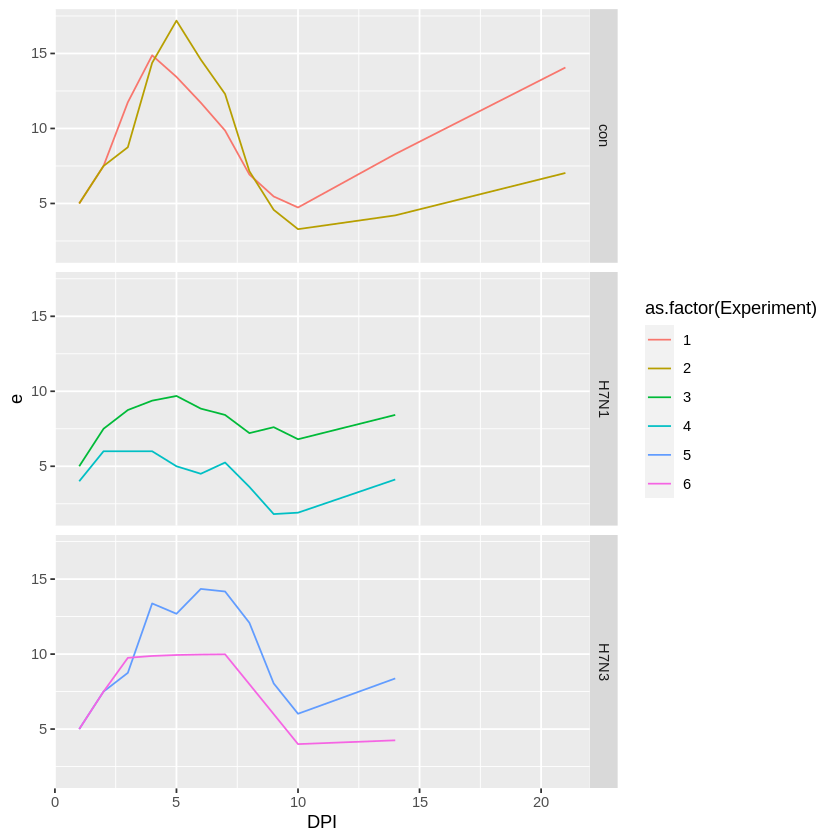

In [ ]:
ggplot(HPAIboth, outcome = "both")+
  geom_path(aes(DPI, e, colour = as.factor(Experiment)))+
  facet_grid(Vac~.)



In [ ]:
#use the new data set
fit <- glm(data = HPAIboth[HPAIboth$s >0 & HPAIboth$e >0,   ],cbind(c,s - c) ~ factor(Vac), family=binomial(link="cloglog"),offset=log((e/n) * dt))
summary(fit)


Call:
glm(formula = cbind(c, s - c) ~ factor(Vac), family = binomial(link = "cloglog"), 
    data = HPAIboth[HPAIboth$s > 0 & HPAIboth$e > 0, ], offset = log((e/n) * 
        dt))

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.4677     0.3235   1.446    0.148    
factor(Vac)H7N1  -4.7944     1.0533  -4.552 5.32e-06 ***
factor(Vac)H7N3  -2.4892     0.5227  -4.763 1.91e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 93.540  on 40  degrees of freedom
Residual deviance: 49.465  on 38  degrees of freedom
AIC: 62.945

Number of Fisher Scoring iterations: 6


### Bayesian regression

In [ ]:
#Bayesian method
fit.bayes <- bayesglm(data = HPAIboth[HPAIboth$s >0 & HPAIboth$e >0,   ],
                  cbind(c,s - c) ~ factor(Vac),
                  family=binomial(link="cloglog"),
                  offset=log((e/n) * dt),
                  prior.mean = 0,
                  prior.scale = 1,
                  prior.df = 1,
                  prior.mean.for.intercept = 0.5)




In [ ]:
summary(fit.bayes)

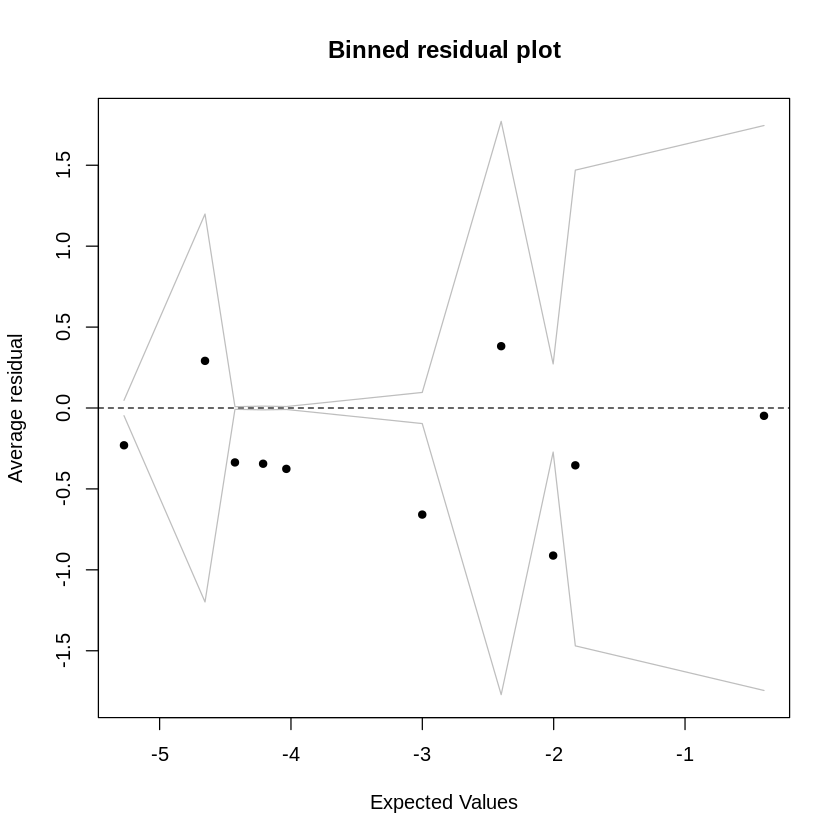

In [ ]:
binnedplot(predict(fit.bayes), resid(fit.bayes))

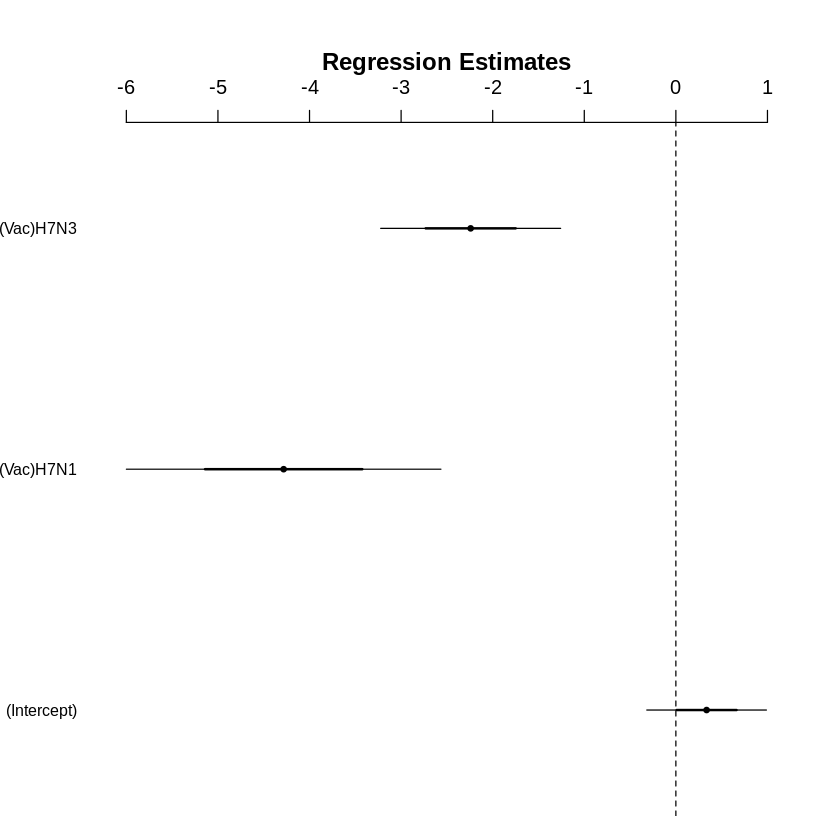

In [ ]:
coefplot(fit.bayes,intercept = TRUE)